In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
import matplotlib.pyplot as plt

# Load the model and scaler
model = tf.keras.models.load_model('SpotifyModelOptimized_5.h5')
scaler = joblib.load('scaler_5.pkl')
with open('training_columns 2.txt', 'r') as f:
    training_columns = [line.strip() for line in f]

# Read test data from CSV
test_data = pd.read_csv('most_pop.csv')

# Function to preprocess and predict
def predict(test_data):
    # Ensure the test_data is in the expected format
    dummied_input_data = pd.get_dummies(test_data, columns=['genre'])
    dummied_input_data = dummied_input_data.reindex(columns=training_columns, fill_value=0)
    scaled_input_data = scaler.transform(dummied_input_data)

    # Make prediction
    predictions = model.predict(scaled_input_data)
    return predictions

# Make predictions on test data
results = predict(test_data)

# Print results
for i, probabilities in enumerate(results):
    chosen_class = np.argmax(probabilities)
    class_labels = ['1stQ', '2ndQ', '3rdQ', '4thQ']
    print(f"Data Point {i+1}:")
    print(f"Probabilities: {probabilities}")
    print(f"Chosen Class: {class_labels[chosen_class]}")
    print()




/Users/luisherran/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Data Point 1:
Probabilities: [0.01435454 0.25511515 0.64765435 0.08287595]
Chosen Class: 3rdQ



/Users/luisherran/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/luisherran/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[0.01435454 0.25511515 0.64765435 0.08287595]


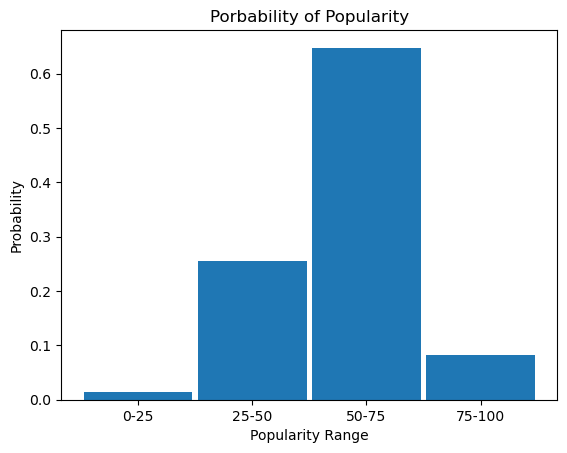

In [11]:
labels =['0-25', '25-50', '50-75', '75-100']
popularity = probabilities
print(popularity)
plt.bar(labels, popularity, width=0.95)
plt.xlabel('Popularity Range')
plt.ylabel('Probability')
plt.title('Porbability of Popularity')
plt.show()